### Case Study on Zomato Restaurant Rating Prediction

 
### Problem Statement
Zomato, the online food app, has reached out to help them to predict how good or bad a restaurant will turn out in the future. So that, they can take a decision to include the restaurant in their app or remove it.

They have shared the data of 9551 restaurants from all over the world which are currently present in the Zomato App. It contains the details about the restaurants and what rating it achieved finally.

Task is to create a machine learning model which can predict the Rating of a restaurant based on its characteristics.



### Data description
The business meaning of each column in the data is as below

1. **Restaurant ID:** The id for each restaurant
2. **Restaurant Name:** The brand/restaurant name
3. **Country Code:** In which country the restaurant is operating
4. **City:** In which city the restaurant is operating
5. **Address:** What is the address of the restaurant
6. **Locality:** What is the locality of the restaurant
7. **Locality Verbose:** Detailed locality description
8. **Longitude:** GPS longitude location
9.  **Latitude:** GPS latitude location
10. **Cuisines:** Various type of food offered
11. **Currency:** The business currency
12. **Has Table booking:** Is advance table booking facility available?
13. **Has Online delivery:** Does they take online food orders?
14. **Is delivering now:** Is is open now?
15. **Switch to order menu:** Whether switch to order menu is available?
16. **Price range:** The price range of the restaurant
17. **Votes:** The number of people who voted for the rating
18. **Average Cost for two:** The typical cost for two people
19. **Rating:** The final rating of the restaurant 

### 1. Importing Libraries

In [9]:
# import pandas library
import pandas as pd

# import numpy library
import numpy as np

# import seaborn library
import seaborn as sns

# import matplotlib library
import matplotlib.pyplot as plt

# import stats library
from scipy import stats

# import labelEncoder
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

# import train test split
from sklearn.model_selection import train_test_split

import statsmodels.api as sm 
from scipy.stats import f_oneway

# import crossval
from sklearn.model_selection import cross_val_score

# importing libraries to calculte errors of the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import PowerTransformer


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor



from sklearn import metrics
# # import warning library to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')



In [10]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)


### 2. Reading the dataset

In [11]:
zomato_data = pd.read_csv('ZomatoData.csv',encoding='latin')

In [12]:
zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


### 3. Defining the Target variable and determining the approach for Machine Learning
To create a predictive model which can predict the future Rating of a restaurant

Target Variable: Rating

Predictors: location, menu, cost etc.



Rating=1 Worst

Rating=5 Best

Based on the problem statement you can understand that we need to create a **supervised ML Regression model**, as the target variable is Continuous.

### 4. Basic EDA

#### Checking for shape

In [13]:
zomato_data.shape

(9551, 19)

**Inference: There are total 9551 rows and 19 columns.**

#### Dropping duplicates

In [14]:
zomato_data.duplicated().sum()

0

**Inference: There are no duplicated records to drop moving on for further anlaysis.**

#### Checking for summary

In [15]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

 **Inference: There are total 11 object type columns and 8 numeric columns.**

#### Checking for describe

In [16]:
zomato_data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,56.750546,41.467058,11.007935,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,1.000000,-157.948486,-41.330428,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,1.000000,77.191964,28.570469,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,1.000000,77.282006,28.642758,2.000000,131.000000,700.000000,3.700000
max,1.850065e+07,216.000000,174.832089,55.976980,4.000000,10934.000000,800000.000000,4.900000


In [17]:
zomato_data.describe(include=object)

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551


#### Checking for nnumber of uniques in each features

In [18]:
zomato_data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                   1012
Average Cost for two     140
Rating                    33
dtype: int64

**Inference:**
**From above analysis we can drop some of the columns like 'Restaurant ID', 'Restaurant Name', 'City', 'Address','Locality', 'Locality Verbose'  as they are not signnificant to keep.**

**Will remove these features in the upcoming steps.**



### 5. Feature Engineering

**In this data the "Cuisines" column cannot be used directly because it will increase the dimensions upto 185. Hence, we can count the number of cuisines offered, which can be a number, hence it can be used in ML.**

In [19]:
zomato_data['Cuisine_count'] = zomato_data['Cuisines'].apply(lambda x : len(str(x).split(',')))

#### Removing unnecessary columns

In [20]:
# Deleting the columns which are not useful in bulding the model as they are qualitative in nature.
cols = ['Restaurant ID', 'Restaurant Name','City','Address',
                  'Locality', 'Locality Verbose','Cuisines']
zomato_data.drop(cols,axis=1,inplace=True)

### 6. Visualization

In [21]:
cat_cols = ['Country Code','Currency','Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range','Cuisine_count']

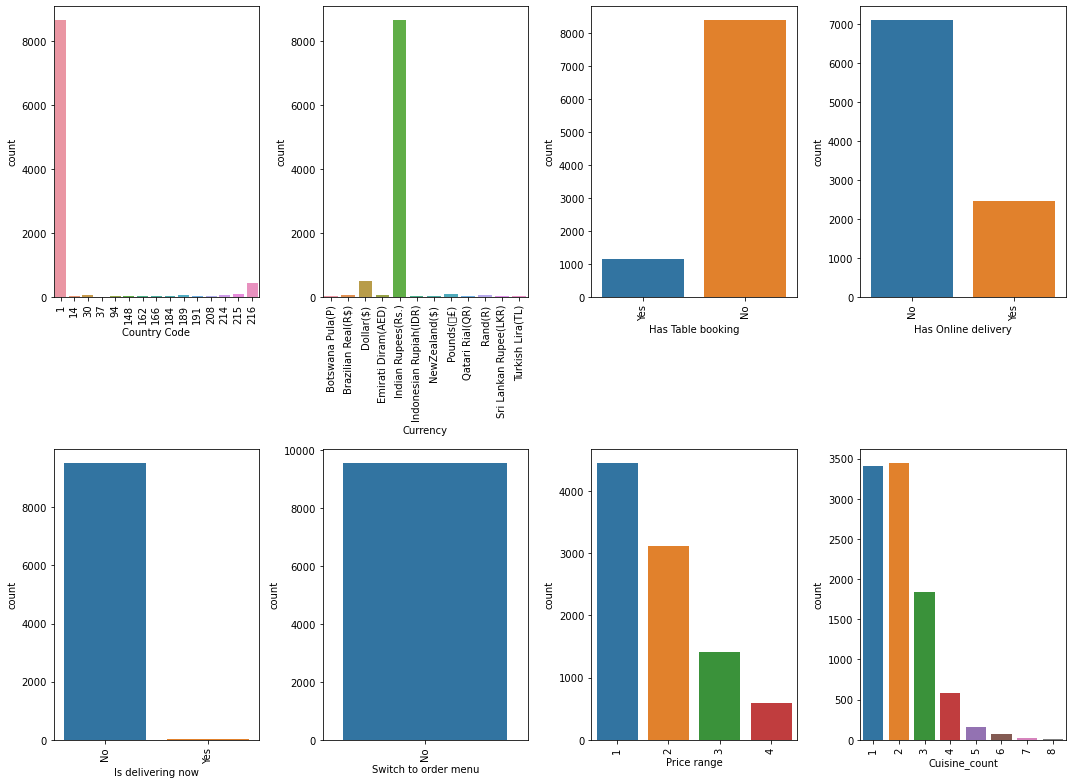

In [22]:
plt.figure(figsize =(15,11))
index = 1
for i in cat_cols:
    plt.subplot(2,4,index)
    sns.countplot(zomato_data[i])
    plt.xticks(rotation =90)
    index += 1
plt.tight_layout()
plt.show()
    
    


**Inference:** 

From the above graph we found out`'Country Code','Currency','Is delivering now', 'Switch to order menu'` is not adding any value for building the model as they consists almost one dominating value in most of the observation, and can be removed.

### b. Univariate - Numerical

In [23]:
zomato_data.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Votes', 'Average Cost for two',
       'Rating', 'Cuisine_count'],
      dtype='object')

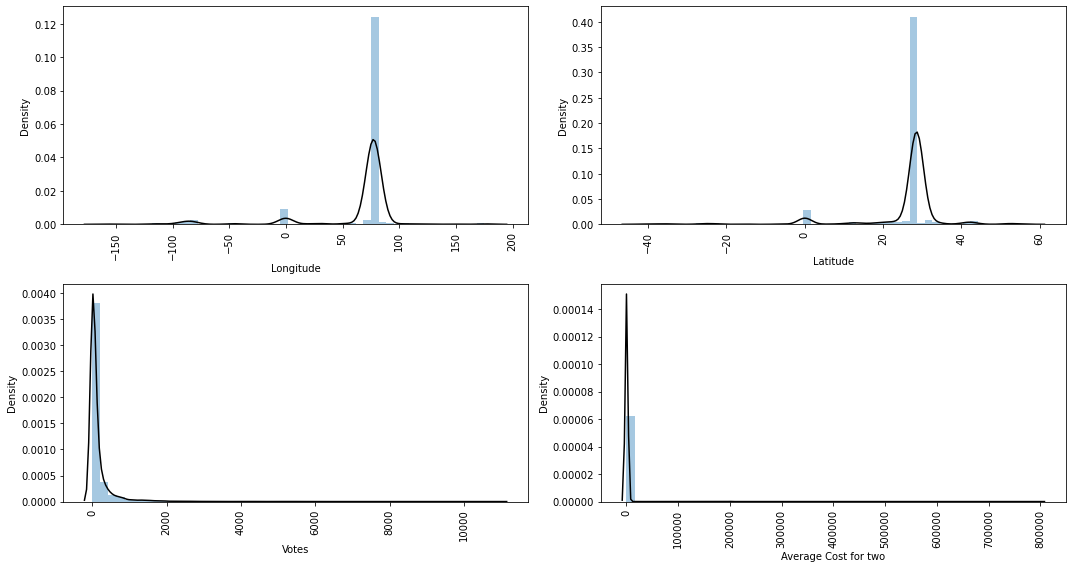

In [24]:
plt.figure(figsize =(15,8))
index = 1
for i in ['Longitude', 'Latitude','Votes','Average Cost for two']:
    plt.subplot(2,2,index)
    sns.distplot(zomato_data[i],kde=True,kde_kws={'color':'black'})
    plt.xticks(rotation =90)
    index += 1
plt.tight_layout()
plt.show()
    
    

**Inference:**
Can see`Votes` and `Average Cost for two` column consists outliers and need treatment which will be performed in futher steps.

### c. Bivariate - Categorical vs Target Variable

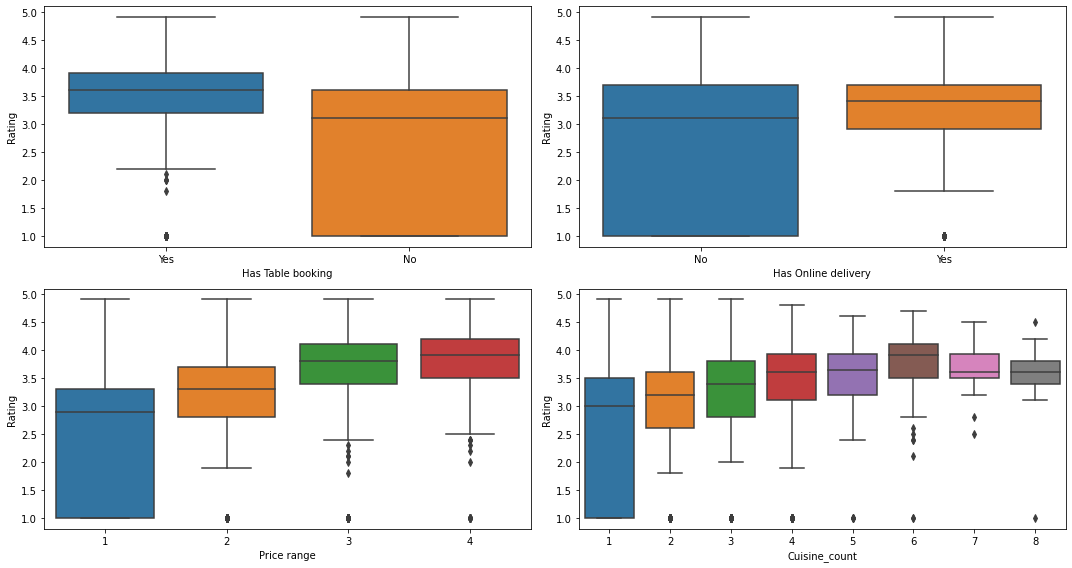

In [25]:
plt.figure(figsize =(15,8))
index = 1
for i in ['Has Table booking', 'Has Online delivery','Price range','Cuisine_count']:
    plt.subplot(2,2,index)
    sns.boxplot(zomato_data[i],zomato_data['Rating'])
    index += 1
    
plt.tight_layout()
plt.show()
    

### d. Bivariate - Numerical vs Target Variable

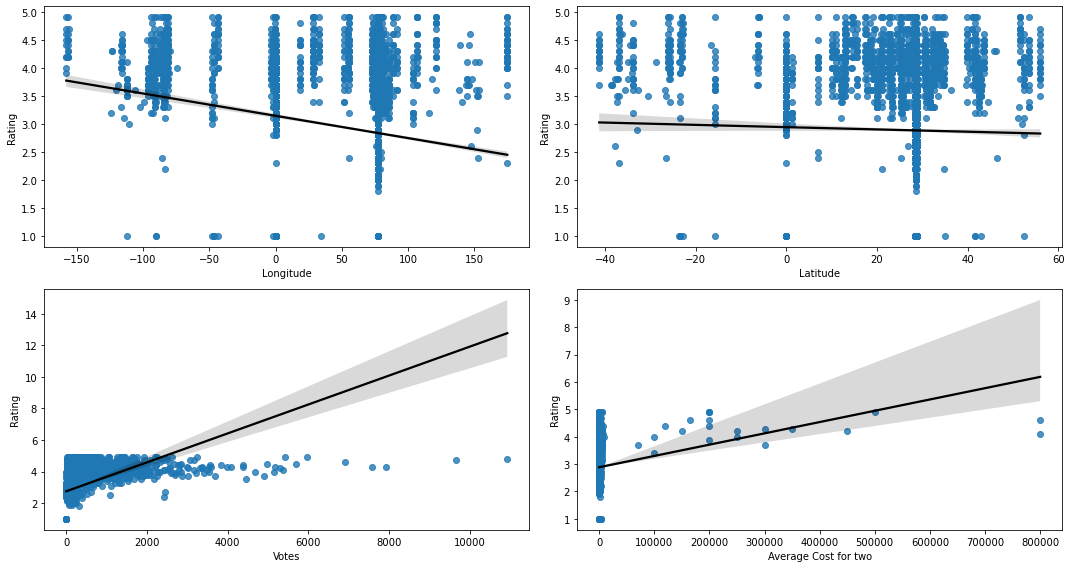

In [26]:
plt.figure(figsize =(15,8))
index = 1
for i in ['Longitude', 'Latitude','Votes','Average Cost for two']:
    plt.subplot(2,2,index)
    sns.regplot(zomato_data[i],zomato_data['Rating'],line_kws={'color':'black'})
    index += 1
    
plt.tight_layout()
plt.show()
    

**Inference:**
From the above plot we can see `Votes` and `Average Cost for two` columns has correlation with Target variable.

### e. Mulitvariate Analysis

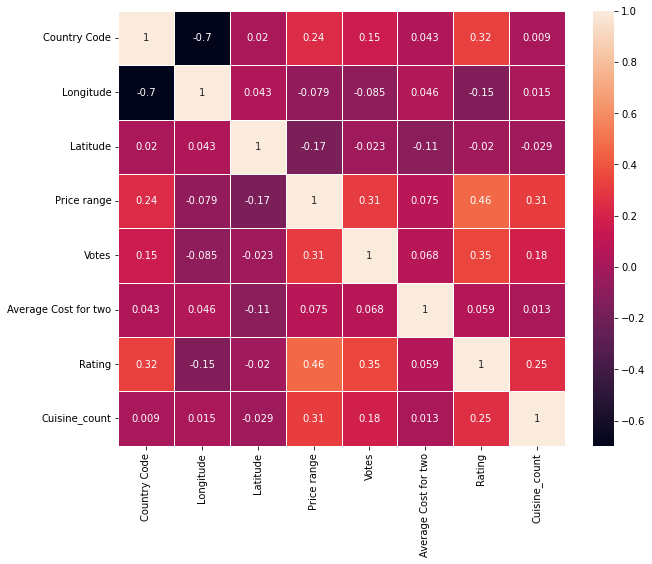

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(zomato_data.corr(),annot=True,fmt='.2g',linewidths=1)
plt.show()

**Inference:** 
- With the Target Variable Longitude and Latitude has least correlation which means they are not a significant variable to build a model and can be removed.


### 7. Missing Values

In [28]:
zomato_data.isna().sum()

Country Code            0
Longitude               0
Latitude                0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
Cuisine_count           0
dtype: int64

**Inference:**
Bingo!!! As we can see there are no null values hence, no treatment.

### 8. Outliers Treatment

As we have seen from the Univariate - Numerical graph `Votes` and `Average Cost for two` columns consists some outliers. Will treat them by replacing using maximum values nearest to 4000 and 50000 for columns respectivley.

In [29]:
# Finding nearest value to 4000
zomato_data['Votes'][zomato_data['Votes']<4000].sort_values(ascending=False)


7863    3986
821     3848
3992    3697
3119    3591
1861    3569
731     3533
6848    3530
5007    3495
3083    3413
2300    3374
2490    3370
7033    3311
2495    3244
3026    3206
3095    3164
501     3157
511     3074
3055    3010
3599    3010
3589    3002
4649    2860
9167    2847
1258    2843
4087    2826
1555    2806
3438    2777
3316    2724
3060    2689
2492    2662
3016    2639
3013    2620
3049    2589
2406    2584
2304    2553
5026    2549
6712    2514
9157    2510
591     2510
3008    2460
600     2424
3112    2417
726     2416
1247    2412
727     2369
3093    2333
355     2324
824     2272
3115    2252
3986    2247
374     2238
2413    2224
2311    2218
6317    2213
9296    2212
1147    2191
3041    2185
2635    2131
3018    2093
1464    2093
2483    2083
2488    2076
2485    2040
8434    2019
3028    2003
369     1998
6701    1980
7087    1971
3319    1970
3107    1959
1253    1949
3101    1942
3601    1934
2302    1932
4673    1914
1554    1902
3056    1891
1163    1887

In [30]:
# Replacing all values greater than 4000 with 3986
zomato_data['Votes'][zomato_data['Votes']>4000] = 3986

In [31]:
# Finding nearest value to 50000
zomato_data['Average Cost for two'][zomato_data['Average Cost for two']<50000].sort_values(ascending=False)

7543    8000
4088    7000
4087    6500
7494    6000
7538    6000
7492    6000
8       6000
7499    6000
7522    5500
7539    5500
7512    5100
7497    5000
7536    5000
7534    5000
7296    5000
3064    5000
7297    5000
7485    5000
7514    5000
7521    5000
4298    5000
1217    5000
4958    5000
3594    4800
5838    4700
4961    4500
9512    4500
4366    4500
4023    4500
7513    4500
7540    4500
7488    4500
7515    4500
1522    4500
4962    4500
7529    4500
7510    4500
4019    4500
7532    4400
7484    4300
7537    4200
7483    4100
2253    4000
1523    4000
3591    4000
7520    4000
7495    4000
3601    4000
9514    4000
7542    4000
4015    4000
7304    4000
4022    4000
2       4000
9504    4000
7299    3800
7480    3700
6768    3700
3592    3650
633     3600
7479    3600
7486    3600
8162    3500
7519    3500
7518    3500
1216    3500
7523    3500
7528    3500
4018    3500
7295    3500
4343    3500
2252    3500
3586    3500
9506    3500
4086    3500
1867    3300
3605    3300

In [32]:
# Replacing all values greater than 50000 with 8000
zomato_data['Average Cost for two'][zomato_data['Average Cost for two']>50000] = 8000

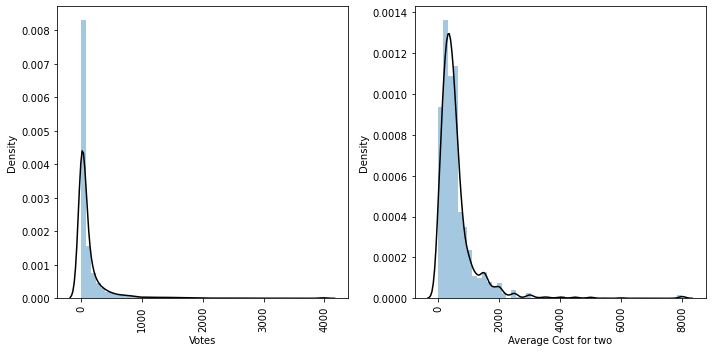

In [33]:
plt.figure(figsize =(10,5))
index = 1
for i in ['Votes','Average Cost for two']:
    plt.subplot(1,2,index)
    sns.distplot(zomato_data[i],kde=True,kde_kws={'color':'black'})
    plt.xticks(rotation =90)
    index += 1
plt.tight_layout()
plt.show()
    

**Inference:**
From the above plot we can see that distribution has improved and acceptable for modeling.

### 9. Feature Selection

- **For continuous vs Target Variable.**

    From Correlation matrix (Heatmap) we have seen that Longitude and Latitude has low correlation value with the target variable. Hence, removing  these two columns.



- **For categorical vs Target Variable.**

    We can use Anova Test to find significant features.
    
    Hypothesis for the given test:
        H0 = There is NO relation between the given variables
        Ha = There is a relation between the given variables 

In [34]:
# Calculating the one-way ANOVA F-test between each categorical variable and a continuous target variable.
def cat_target_relationship(df, cat_vars, target_var):
    results = pd.DataFrame(columns=['F-statistic', 'p-value'])
    for var in cat_vars:
        groups = df.groupby(var)[target_var].apply(list)
        f_stat, p_val = f_oneway(*groups)
        results.loc[var] = [f_stat, p_val]
    return results



In [35]:
cat_cols = ['Has Table booking', 'Has Online delivery', 'Price range','Cuisine_count']
cat_target_relationship(zomato_data,cat_cols,'Rating')


,F-statistic,p-value
Has Table booking,375.738730,3.939304e-82
Has Online delivery,425.355711,1.695259e-92
Price range,913.352343,0.000000e+00
Cuisine_count,96.168482,2.966761e-136


As p_value for all the features are less than 0.5, we reject H0 and conclude that all the categorical variables are significant.

**Final features for Modeling**

In [36]:
zomato_data_final = zomato_data[['Votes','Average Cost for two','Has Table booking',
                 'Has Online delivery','Price range','Rating']]

In [37]:
zomato_data_final.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating
0,314,1100,Yes,No,3,4.8
1,591,1200,Yes,No,3,4.5
2,270,4000,Yes,No,4,4.4
3,365,1500,No,No,4,4.9
4,229,1500,Yes,No,4,4.8


### 9. Feature Encoding and Converting datatype to numeric for ML

In [38]:
# Converting 'Has Table booking' and 'Has Online delivery' values to numeric
zomato_data_final['Has Online delivery'] =zomato_data_final['Has Online delivery'].map({'Yes':1,'No':0})
zomato_data_final['Has Table booking'] =zomato_data_final['Has Table booking'].map({'Yes':1,'No':0})

**Final dataset is ready for modeling, now will split the data into train and test set.**

### 10. Scaling, Spliting the dataset and performing ML

In [39]:
X = zomato_data_final.drop('Rating',axis =1)
y = zomato_data_final.Rating

# Using StandardScaler to scale the predictors data
ss = StandardScaler()
X = ss.fit_transform(X)

# Spliting into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

### 11. Building the models and evaluation of performance

### Multiple Linear Regression

In [40]:
# Building Linear Regression Model
linreg = LinearRegression()
linreg_model = linreg.fit(X_train,y_train)

y_train_pred = linreg_model.predict(X_train)
y_test_pred = linreg_model.predict(X_test)

print("R2_score on training: ",(np.round(metrics.r2_score(y_train,y_train_pred),4)))
print("R2_score on testing: ",(np.round(metrics.r2_score(y_test,y_test_pred),4)))


R2_score on training:  0.3061
R2_score on testing:  0.2957


In [41]:
# On training
mse = round(metrics.mean_squared_error(y_train,y_train_pred),4)
rmse = round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),4)
print(f'MSE for Train data: {mse}')
print(f'RMSE for Train data: {rmse}')

# On test data
mse = round(metrics.mean_squared_error(y_test,y_test_pred),4)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),4)
print(f'\nMSE for Test data: {mse}')
print(f'RMSE for Test data: {rmse}')

MSE for Train data: 0.8901
RMSE for Train data: 0.9434

MSE for Test data: 0.8834
RMSE for Test data: 0.9399


### KNN

In [42]:
# Building KNN Model
knn = KNeighborsRegressor(n_neighbors=3,metric='euclidean')
knn_model = knn.fit(X_train,y_train)

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

print("R2_score on training: ",(np.round(metrics.r2_score(y_train,y_train_pred),4)))
print("R2_score on testing: ",(np.round(metrics.r2_score(y_test,y_test_pred),4)))


R2_score on training:  0.9367
R2_score on testing:  0.8663


In [45]:
# On training
mse = round(metrics.mean_squared_error(y_train,y_train_pred),4)
rmse = round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),4)
print(f'MSE for Train data: {mse}')
print(f'RMSE for Train data: {rmse}')

# On test data
mse = round(metrics.mean_squared_error(y_test,y_test_pred),4)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),4)
print(f'\nMSE for Test data: {mse}')
print(f'RMSE for Test data: {rmse}')

MSE for Train data: 0.0811
RMSE for Train data: 0.2848

MSE for Test data: 0.1677
RMSE for Test data: 0.4095


### Decision Tree

In [47]:
# Building KNN Model
dt = DecisionTreeRegressor(max_depth=6,criterion='mse')
dt_model = dt.fit(X_train,y_train)

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

print("R2_score on training: ",(np.round(metrics.r2_score(y_train,y_train_pred),4)))
print("R2_score on testing: ",(np.round(metrics.r2_score(y_test,y_test_pred),4)))


R2_score on training:  0.9114
R2_score on testing:  0.9026


In [48]:
# On training
mse = round(metrics.mean_squared_error(y_train,y_train_pred),4)
rmse = round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),4)
print(f'MSE for Train data: {mse}')
print(f'RMSE for Train data: {rmse}')

# On test data
mse = round(metrics.mean_squared_error(y_test,y_test_pred),4)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),4)
print(f'\nMSE for Test data: {mse}')
print(f'RMSE for Test data: {rmse}')

MSE for Train data: 0.1136
RMSE for Train data: 0.3371

MSE for Test data: 0.1222
RMSE for Test data: 0.3495


### Random Forest

In [49]:
# Building KNN Model
rf = RandomForestRegressor(max_depth=2, n_estimators=400,criterion='mse')
rf_model = rf.fit(X_train,y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print("R2_score on training: ",(np.round(metrics.r2_score(y_train,y_train_pred),4)))
print("R2_score on testing: ",(np.round(metrics.r2_score(y_test,y_test_pred),4)))


R2_score on training:  0.8814
R2_score on testing:  0.8727


In [50]:
# On training
mse = round(metrics.mean_squared_error(y_train,y_train_pred),4)
rmse = round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),4)
print(f'MSE for Train data: {mse}')
print(f'RMSE for Train data: {rmse}')

# On test data
mse = round(metrics.mean_squared_error(y_test,y_test_pred),4)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),4)
print(f'\nMSE for Test data: {mse}')
print(f'RMSE for Test data: {rmse}')

MSE for Train data: 0.1521
RMSE for Train data: 0.39

MSE for Test data: 0.1596
RMSE for Test data: 0.3995


### AdaBoost

In [51]:
# Building KNN Model
DTR = DecisionTreeRegressor(max_depth=3)
abr = AdaBoostRegressor(n_estimators=500, base_estimator=DTR,learning_rate=0.04)
abr_model = abr.fit(X_train,y_train)

y_train_pred = abr_model.predict(X_train)
y_test_pred = abr_model.predict(X_test)

print("R2_score on training: ",(np.round(metrics.r2_score(y_train,y_train_pred),4)))
print("R2_score on testing: ",(np.round(metrics.r2_score(y_test,y_test_pred),4)))


R2_score on training:  0.8946
R2_score on testing:  0.8874


In [52]:
# On training
mse = round(metrics.mean_squared_error(y_train,y_train_pred),4)
rmse = round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),4)
print(f'MSE for Train data: {mse}')
print(f'RMSE for Train data: {rmse}')

# On test data
mse = round(metrics.mean_squared_error(y_test,y_test_pred),4)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),4)
print(f'\nMSE for Test data: {mse}')
print(f'RMSE for Test data: {rmse}')

MSE for Train data: 0.1352
RMSE for Train data: 0.3677

MSE for Test data: 0.1412
RMSE for Test data: 0.3757


### XGBoost

In [53]:
# Building KNN Model
xgb = XGBRegressor(max_depth=2,n_estimators=1000)
xgb_model = xgb.fit(X_train,y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

print("R2_score on training: ",(np.round(metrics.r2_score(y_train,y_train_pred),4)))
print("R2_score on testing: ",(np.round(metrics.r2_score(y_test,y_test_pred),4)))


R2_score on training:  0.9301
R2_score on testing:  0.9062


In [54]:
# On training
mse = round(metrics.mean_squared_error(y_train,y_train_pred),4)
rmse = round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),4)
print(f'MSE for Train data: {mse}')
print(f'RMSE for Train data: {rmse}')

# On test data
mse = round(metrics.mean_squared_error(y_test,y_test_pred),4)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),4)
print(f'\nMSE for Test data: {mse}')
print(f'RMSE for Test data: {rmse}')

MSE for Train data: 0.0897
RMSE for Train data: 0.2994

MSE for Test data: 0.1176
RMSE for Test data: 0.343


**In conclusion Decision Tree is performing better among all tested models for the given dataset and can be used for deployment.**